#   PART1: Data Wrangling

In [27]:
# Canonical Imports (Copy and paste these lines in your IPython notebooks for convenience)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

%matplotlib inline
print(pd.__version__)
from IPython.core.display import HTML
print(os.environ['HOME'])

0.18.0
C:\Software\Pspice\SPB_Data


In [28]:
MY_YELP_JSON_CLEAN_DATA_DIR = 'C:\Academy\CS 838\Project\yelp_dataset_challenge_academic_dataset\Cleaned_Data_Directory'
MY_YELP_CSV_DATA_DIR = MY_YELP_JSON_CLEAN_DATA_DIR
MY_YELP_OUTPUT_DIR = MY_YELP_JSON_CLEAN_DATA_DIR

<h3>Loading a file from your clean data directory</h3>

In [33]:
business_csv_filename = os.path.join(MY_YELP_JSON_CLEAN_DATA_DIR, 'yelp_academic_dataset_business.csv')
business_DF = pd.read_csv(business_csv_filename)
business_DF.rename(columns={'name': 'business_name', 'review_count': 'business_review_count', 'stars': 'business_stars'}, inplace=True)

C:\Software\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (1,4,7,17,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
user_csv_filename = os.path.join(MY_YELP_JSON_CLEAN_DATA_DIR, 'yelp_academic_dataset_user.csv')
user_DF = pd.read_csv(user_csv_filename)
user_DF.rename(columns={'name': 'user_name', 'review_count': 'user_review_count', 'votes': 'user_votes'}, inplace=True)

In [35]:
review_csv_filename = os.path.join(MY_YELP_JSON_CLEAN_DATA_DIR, 'yelp_academic_dataset_review.csv')
review_DF = pd.read_csv(review_csv_filename)
review_DF.rename(columns={'stars': 'review_stars', 'text': 'review_text', 'date': 'review_date', 'votes': 'review_votes'}, inplace=True)

In [36]:
tip_csv_filename = os.path.join(MY_YELP_JSON_CLEAN_DATA_DIR, 'yelp_academic_dataset_tip.csv')
tip_DF = pd.read_csv(tip_csv_filename)
tip_DF.rename(columns={'text': 'tip_text', 'date': 'tip_date'}, inplace=True)

 <h3>Merging DataTables/Frames </h3>

In [23]:
pd.set_option('display.max_colwidth', 500)

In [10]:
tip_DF = tip_DF.groupby(['user_id','business_id', 'date'])['tip_text'].apply(lambda x: ','.join(x)).reset_index()
review_and_tip_DF = pd.merge(review_DF, tip_DF, on =['user_id', 'business_id', 'date'], how='left')
review_and_tip_DF["text"] = review_and_tip_DF["review_text"].map(str) + ', ' +  review_and_tip_DF["tip_text"].map(str)
user_review_and_tip_DF = pd.merge(review_and_tip_DF, user_DF, on =['user_id'], how='inner')
business_user_review_and_tip_DF = pd.merge(user_review_and_tip_DF, business_DF, on =['business_id'], how='inner')



<h3>Discarding unused Python variables that take too much RAM</h3>
<br />
Use the reset_selective magics (takes awhile as well)

In [25]:
'''
%reset_selective business_DF
%reset_selective user_DF
%reset_selective review_DF
%reset_selective tip_DF
%reset_selective review_and_tip_DF
%reset_selective user_review_and_tip_DF
'''

'\n%reset_selective business_DF\n%reset_selective user_DF\n%reset_selective review_DF\n%reset_selective tip_DF\n%reset_selective review_and_tip_DF\n%reset_selective user_review_and_tip_DF\n'

#   PART2: business search

# stars distribution

In [26]:
#%load_ext rpy2.ipython
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
py.sign_in('swu5656', 'zxcvbn')

ImportError: No module named 'plotly'

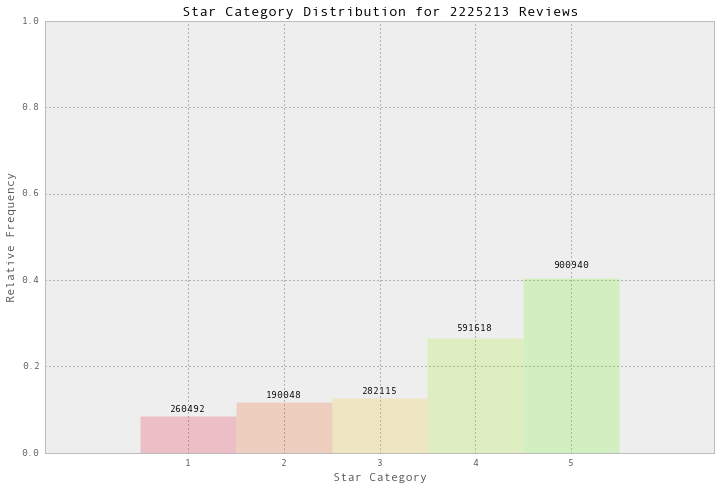

In [32]:
N_star_categories = 5
colors = np.array(['#E50029', '#E94E04', '#EEC708', '#A5F30D', '#62F610']) # 1, 2, 3, 4, and 5 stars respectively

stars_labels = np.array([x_stars+1 for x_stars in range(N_star_categories)])
star_category_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(N_star_categories)
star_category_absolute_frequencies = business_user_review_and_tip_DF.review_stars.value_counts(ascending=True)
star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))

rects = plt.bar(bar_plot_indices, star_category_relative_frequencies, width=1, color=colors, alpha=.2)
for (idx, rect) in enumerate(rects):
        plt.gca().text(rect.get_x()+rect.get_width()/2., 1.05*rect.get_height(), '%d'%int(star_category_absolute_frequencies[idx+1]),
                ha='center', va='bottom')


plt.xticks(bar_plot_indices+0.5, stars_labels, rotation='horizontal')
#x, labels, rotation='vertical'

plt.xlabel('Star Category')
plt.ylabel('Relative Frequency')
plt.ylim([0,1])
plt.title('Star Category Distribution for {0} Reviews'.format(len(business_user_review_and_tip_DF)))
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)


plt.show()

In [33]:
 business_user_review_and_tip_DF

,user_id,review_id,review_text,votes.cool_x,business_id,votes.funny_x,review_stars,date,type_x,votes.useful_x,...,attributes.Noise Level,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Music.jukebox,attributes.Ambience.upscale
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it does seem like a throwback to 30 years ago, old fashioned menu board, booths out of the 70s, and a large selection of food. Their speciality is the Italian Hoagie, and it is voted the best in the area year after year. I usually order the burger, while the patties are obviously cooked from frozen, all of the other ingredients are very fresh. Overall, its a good alternative to Subway, which is down the road.",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,...,average,NaN,casual,NaN,True,[],NaN,False,NaN,False
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,"Excellent food. Superb customer service. I miss the mario machines they used to have, but it's still a great place steeped in tradition.",0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0,...,average,NaN,casual,NaN,True,[],NaN,False,NaN,False
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not opened on the weekend. But other than that the staff is always pleasant and fast to make your order. Which is always spot on fresh veggies on their hoggies and other food. They also have daily specials and ice cream which is really good. I had a banana split they piled the toppings on. They win pennysaver awards ever years i see why.,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0,...,average,NaN,casual,NaN,True,[],NaN,False,NaN,False
3,PUFPaY9KxDAcGqfsorJp3Q,58tIa8PfEnUnPsIV_BUS3w,It is now a shop and save.,0,WaHXyBwljbKNPmmJZn5j8Q,0,3,2012-08-01,review,0,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,2jkE2AhFum7t3jHSngMZtg,ETRsln9MFkHsTqi87pB0GQ,living alone I love the 5 for $20 deals they have on meat. I also love Faygo products when I have a party or bbq so their sales are always right on time. They don't have as many stores in the area but they are worth checking out. The lines are a lot shorter and the staff is a lot friendlier.,0,WaHXyBwljbKNPmmJZn5j8Q,0,3,2014-07-26,review,0,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5,l6RO4HXjXbA0LNebJG2y5g,1UpVeIjejdtxjb1RtgXeSA,This store has changed hands many times over the past few years and it shows. Fifteen years ago if you didn't get there by 9am you would have fight a crowd. Now it never seems all that busy. Many of the store's best and dedicated employees left or were let go (about five years ago) and product lines change with each new owner. The most recent owner seems to be improving the store and employee turnover has seemed to slow.,0,WaHXyBwljbKNPmmJZn5j8Q,0,3,2014-08-22,review,0,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
6,PUFPaY9KxDAcGqfsorJp3Q,Vn4Uxe0sLHDSAllDa2iWDw,"I have to admit, the first time I hate here, I absolutely hated the pizza. And I think it was because I was expecting something completely different than I got. Latina Pizza is very different from most pizza shops. Instead if a round thin crust pizza, this pizza is square, thick, and doughy. The crust is not really that good, but that is not why you get a pizza here. It's the homemade sauce. And that it is a family owned place that is really pretty inexpensive. \n\nThe other nice thing abou...",0,u22QDAON1kk0wjoTliyftw,0,4,2012-08-05,review,4,...,NaN,NaN,casual,NaN,True,[],NaN,NaN,NaN,NaN
7,2l_VuWR75EUOxTarAwIK9w,KvAuJ5ktYlH1ugtlRTGk-A,Underated and ignored! if you see this ol time pizzaria near Kennywood stop on by good crust nice and buttery in the sicilian style! Better then DiSallas the only thing I can say that is better then Latinas is Mineo's ! they say the best pizzarias are the little holes in the wall type places and this is one of those enviroments! Small and cozy

# Rating trend on individual business

In [34]:
company = 'zzucnDH33KlmbkI4rLyQTA'

In [35]:

gbt = business_user_review_and_tip_DF.groupby(['business_id', 'date'])



 

In [36]:
meanGbt = business_user_review_and_tip_DF.groupby(['business_id', 'date']).mean()


In [37]:
businessStarOverview= meanGbt.loc[[company], 'review_stars']

In [38]:
businessStarOverview

business_id             date      
zzucnDH33KlmbkI4rLyQTA  2008-11-05    5
                        2008-12-31    2
                        2009-12-16    4
                        2010-02-08    4
                        2010-02-26    1
                        2010-03-06    2
                        2011-01-02    1
                        2011-01-08    4
                        2011-02-02    4
                        2011-03-01    4
                        2011-08-29    5
                        2012-01-24    5
                        2013-01-03    4
                        2013-01-08    5
                        2014-12-29    5
                        2015-01-19    1
                        2015-03-27    1
                        2015-04-01    1
                        2015-04-14    3
                        2015-04-16    1
                        2015-10-28    5
                        2015-12-06    2
                        2015-12-07    4
                        2015-12-19    5
     

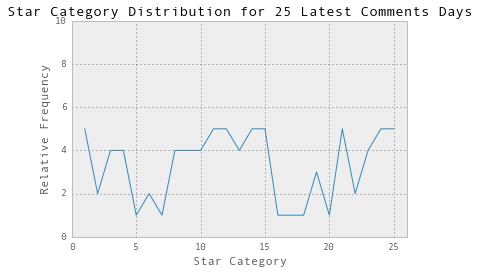

In [39]:
plt.plot(np.array([x + 1 for x in range(businessStarOverview.count())]), businessStarOverview)
plt.axis([0, businessStarOverview.count() +1 , 0, 10])


#plt.xticks(businessStarOverview.index.levels[1], stars_labels, rotation='horizontal')
#x, labels, rotation='vertical'

plt.xlabel('Star Category')
plt.ylabel('Relative Frequency')
plt.ylim([0,10])
plt.title('Star Category Distribution for {0} Latest Comments Days'.format(len(businessStarOverview)))
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)


plt.show()

 

In [40]:
businessStarOverview.index.levels[1]

Index([u'2004-10-12', u'2004-10-18', u'2004-10-19', u'2004-10-24',
       u'2004-10-26', u'2004-12-19', u'2005-01-24', u'2005-01-25',
       u'2005-01-26', u'2005-02-01', 
       ...
       u'2015-12-15', u'2015-12-16', u'2015-12-17', u'2015-12-18',
       u'2015-12-19', u'2015-12-20', u'2015-12-21', u'2015-12-22',
       u'2015-12-23', u'2015-12-24'],
      dtype='object', name=u'date', length=3798)

#wordcould for individual business


In [41]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords

#nltk.download() # download the english stopwords corpus and the punkt package and maybe the porter stemmer if not present

In [42]:
# good tutorial -
# www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html
POSITIVE_WORDS = set([line.strip() for line in open('positive-words.txt', 'r')])
NEGATIVE_WORDS = set([line.strip() for line in open('negative-words.txt', 'r')])
NLTK_STOPWORDS = set(stopwords.words('english'))
MORE_STOPWORDS = set([line.strip() for line in open('more_stopwords.txt', 'r')])

#ALL_STOPWORDS = set(stopwords.words('english'), [line.strip() for line in open('more_stopwords.txt', 'r')])

def lowercase_remove_punctuation_and_tokenize(s):
    s = s.lower()
    s = s.translate(None, string.punctuation)
    # may consider removing arabic-hindu digits
    token_list = nltk.word_tokenize(s)
    exclude_stopwords = lambda token : token not in NLTK_STOPWORDS
    return filter(exclude_stopwords, token_list)

def textProcess(sub_dataframe):
    return lowercase_remove_punctuation_and_tokenize(sub_dataframe)



In [43]:
neutral = business_user_review_and_tip_DF[business_user_review_and_tip_DF['review_stars'].isin([3])]

In [44]:
bad = business_user_review_and_tip_DF[business_user_review_and_tip_DF['review_stars'].isin([1,2])]

In [45]:
good = business_user_review_and_tip_DF[business_user_review_and_tip_DF['review_stars'].isin([4,5])]

In [46]:
gtbNeutral = neutral.groupby(['business_id'])['text'].apply(lambda x: "{%s}" % ', '.join(x))  # group text by business

In [47]:
gtbBad = bad.groupby(['business_id'])['text'].apply(lambda x: "{%s}" % ', '.join(x))  # group text by business

In [48]:
gtbGood = good.groupby(['business_id'])['text'].apply(lambda x: "{%s}" % ', '.join(x))  # group text by business

In [49]:
target = (textProcess(gtbBad[company]), textProcess(gtbNeutral[company]), textProcess(gtbGood[company]))

In [50]:
#http://stackoverflow.com/questions/17841149/pandas-groupby-how-to-get-a-union-of-strings

In [51]:
#business_user_review_and_tip_DF['text']

In [52]:
#df.groupby('A')['C'].apply(lambda x: "{%s}" % ', '.join(x))

In [53]:
#tip_DF = tip_DF.groupby(['user_id','business_id', 'date'])['tip_text'].apply(lambda x: ','.join(x)).reset_index()

In [54]:
REVIEW_STARS_BIGRAMS_DIRECTORY = os.path.join(MY_YELP_OUTPUT_DIR, 'review_stars_bigrams')
REVIEW_STARS_TRIGRAMS_DIRECTORY = os.path.join(MY_YELP_OUTPUT_DIR, 'review_stars_trigrams')

if not os.path.exists(REVIEW_STARS_BIGRAMS_DIRECTORY):
    os.makedirs(REVIEW_STARS_BIGRAMS_DIRECTORY)

if not os.path.exists(REVIEW_STARS_TRIGRAMS_DIRECTORY):
    os.makedirs(REVIEW_STARS_TRIGRAMS_DIRECTORY)

In [55]:
for categories in range(3):
       bigrams = ["%s %s" %bi for bi in nltk.bigrams(target[categories])]
       bigrams_df = DataFrame.from_dict(Counter(bigrams).most_common(len(target[categories])))
       bigram_csv_filepath = os.path.join(REVIEW_STARS_BIGRAMS_DIRECTORY, '{0}_category.csv'.format(categories))
       bigrams_df.to_csv(bigram_csv_filepath, index=False)
    
       trigrams = ["%s %s %s" %tri for tri in nltk.trigrams(target[categories])]
       trigrams_df = DataFrame.from_dict(Counter(trigrams).most_common(len(target[categories])))
       trigram_csv_filepath = os.path.join(REVIEW_STARS_TRIGRAMS_DIRECTORY, '{0}_category.csv'.format(categories))
       trigrams_df.to_csv(trigram_csv_filepath, index=False)
    
    
    
        



In [56]:
import rpy2.interactive as r
import rpy2.interactive.packages
rlib = r.packages.packages
r.packages.importr("utils")
#rlib.utils.install_packages("tm")
#rlib.utils.install_packages("SnowballC")
#rlib.utils.install_packages("wordcloud")
#rlib.utils.install_packages("RColorBrewer")

rpy2.robjects.packages.Package as a <module 'utils' (built-in)>

In [57]:
'''
%%R 
# Install
install.packages("tm",lib="/usr/local/lib/R/3.2/site-library")  # for text mining
install.packages("SnowballC",lib="/usr/local/lib/R/3.2/site-library") # for text stemming
install.packages("wordcloud",lib="/usr/local/lib/R/3.2/site-library") # word-cloud generator 
install.packages("RColorBrewer",lib="/usr/local/lib/R/3.2/site-library") # color palettes

'''


'\n%%R \n# Install\ninstall.packages("tm",lib="/usr/local/lib/R/3.2/site-library")  # for text mining\ninstall.packages("SnowballC",lib="/usr/local/lib/R/3.2/site-library") # for text stemming\ninstall.packages("wordcloud",lib="/usr/local/lib/R/3.2/site-library") # word-cloud generator \ninstall.packages("RColorBrewer",lib="/usr/local/lib/R/3.2/site-library") # color palettes\n\n'

In [58]:
%%R
# Load
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
 

/Desktop/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning:

Loading required package: NLP


/Desktop/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning:

Loading required package: RColorBrewer




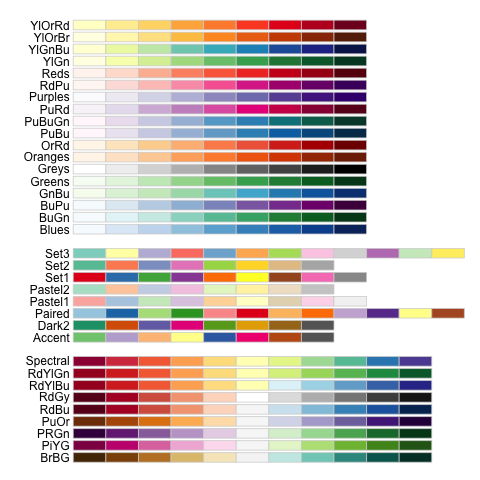

In [59]:
%%R
par(mar = c(0, 4, 0, 0))
display.brewer.all()

In [60]:
%%R -i MY_YELP_OUTPUT_DIR,REVIEW_STARS_TRIGRAMS_DIRECTORY,REVIEW_STARS_BIGRAMS_DIRECTORY

#palettes <- c("Reds", "Oranges", "Blues", "Purples", "Greens")

for (xstars in 0:2) {
    xstars.bigrams.path <- paste(REVIEW_STARS_BIGRAMS_DIRECTORY, '/', xstars, '_category.csv',sep='')
    xstars.trigrams.path <- paste(REVIEW_STARS_TRIGRAMS_DIRECTORY, '/', xstars, '_category.csv',sep='')
    xstars.bigrams.df <- read.csv(xstars.bigrams.path)
    xstars.trigrams.df <- read.csv(xstars.trigrams.path)
    xstars.wordcloud.df <- rbind(xstars.bigrams.df, xstars.trigrams.df)
    xstars.wordcloud.df <- xstars.wordcloud.df[with(xstars.wordcloud.df, order(-X1, X0)),]
    
    
    
    #xstars.bigrams.df <- Corpus(VectorSource(xstars.bigrams.df))
    #xstars.bigrams.df <- TermDocumentMatrix(xstars.bigrams.df)
    #xstars.bigrams.df <- as.matrix(xstars.bigrams.df)
    #xstars.bigrams.df <- sort(rowSums(xstars.bigrams.df),decreasing=TRUE)
    #xstars.bigrams.df <- data.frame(word = names(xstars.wordcloud.df),freq=xstars.wordcloud.df)
    #table(xstars.wordcloud.df$freq)
    pal2 <- brewer.pal(8,"Set3")
    png(paste(MY_YELP_OUTPUT_DIR, '/', xstars, '__star_wordcloud.png',sep=''), width=1280,height=800)
    wordcloud(xstars.wordcloud.df$X0,xstars.wordcloud.df$X1, scale=c(8,.2),min.freq=1,max.words=Inf, random.order=FALSE, rot.per=.15, colors=pal2)
    dev.off()   
    
    
}

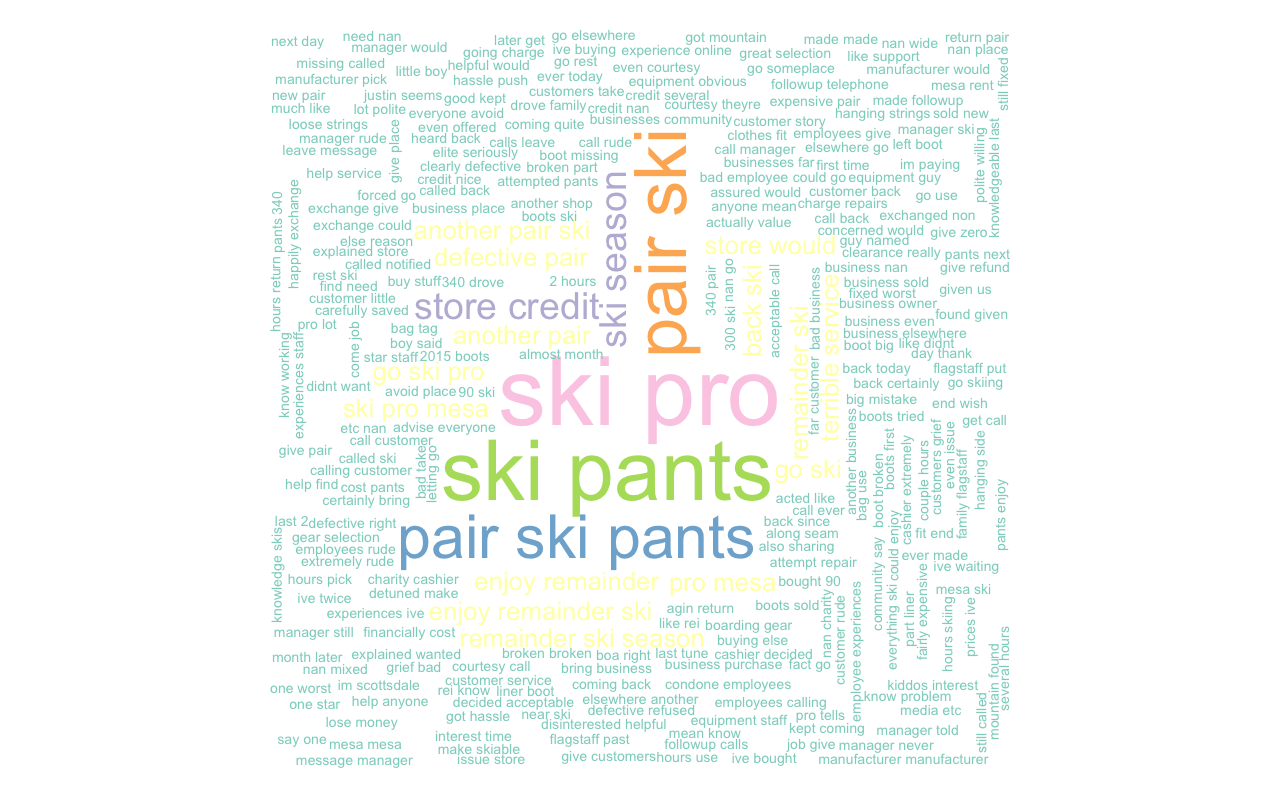

In [61]:
from IPython.core.display import Image
Image(filename=os.path.join(MY_YELP_OUTPUT_DIR, '0__star_wordcloud.png'))

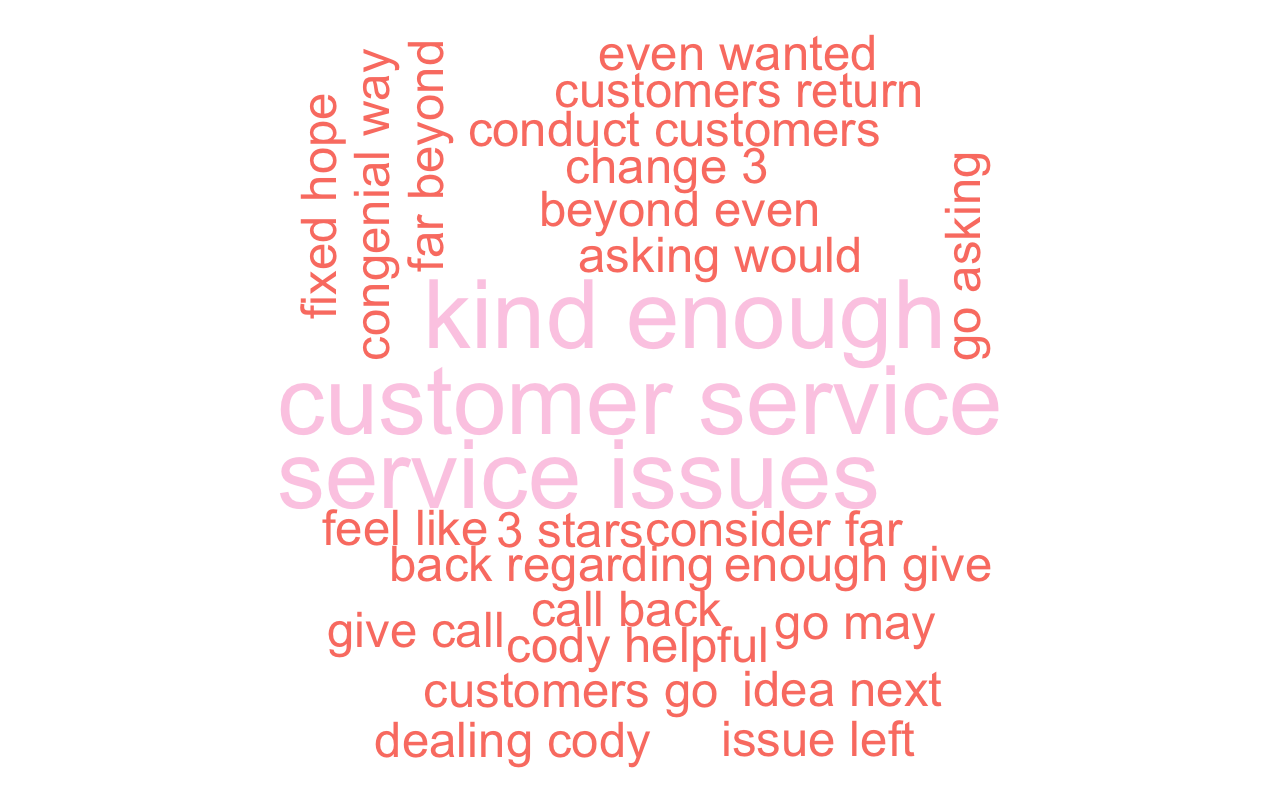

In [62]:
from IPython.core.display import Image
Image(filename=os.path.join(MY_YELP_OUTPUT_DIR, '1__star_wordcloud.png'))

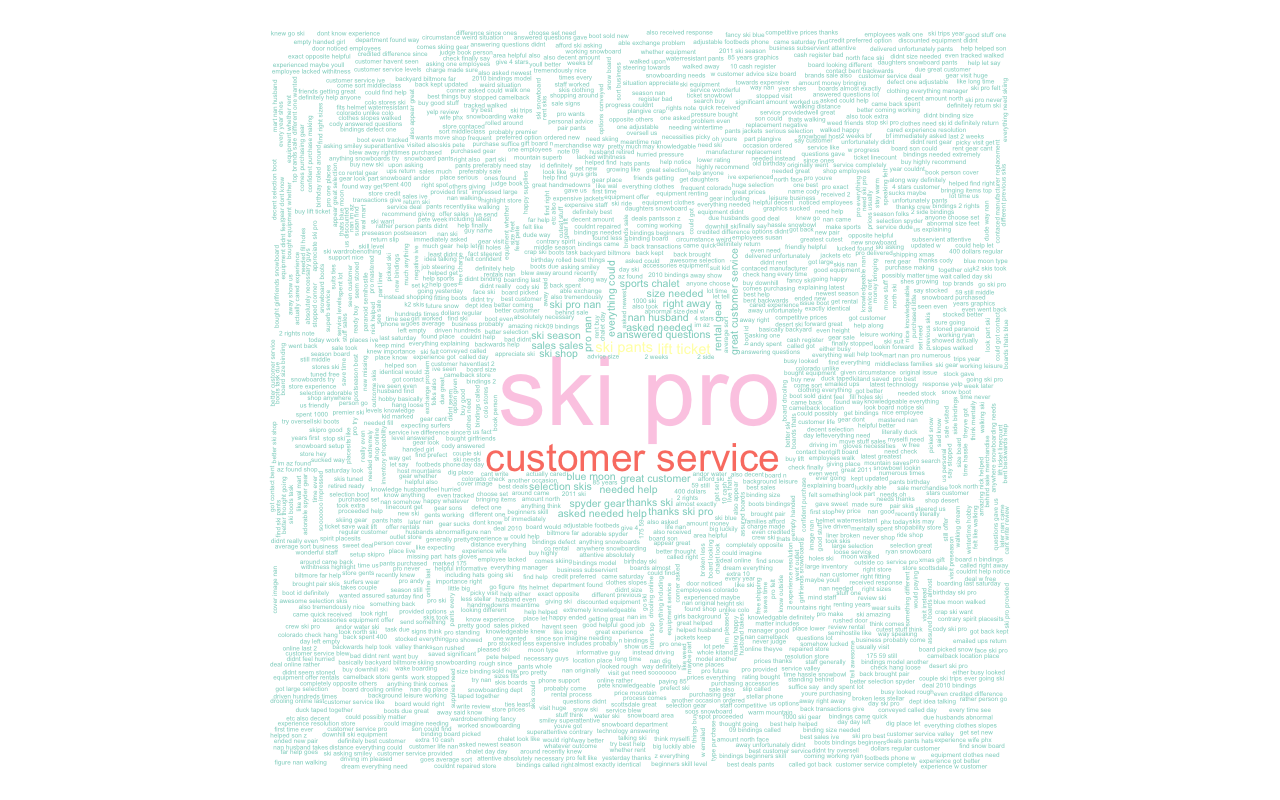

In [63]:
from IPython.core.display import Image
Image(filename=os.path.join(MY_YELP_OUTPUT_DIR, '2__star_wordcloud.png'))

#   PART3: other analysis on the whole dataSet

In [64]:
# start a successful business in MADISON

In [65]:
business_user_review_and_tip_DF.groupby(['city','review_stars'])

In [66]:
Madison_DF = business_user_review_and_tip_DF[business_user_review_and_tip_DF['city'].isin(['Madison'])]

In [67]:
good_Madison_DF = Madison_DF[Madison_DF['review_stars'].isin([5,4])]

In [68]:
best_business_DF = good_Madison_DF['categories'].apply(lambda x: "".join(x))  # group text by business

In [69]:
best_business_DF 

113584                                                    ['Hotels & Travel', 'Airports']
113586                                                    ['Hotels & Travel', 'Airports']
113588                                                    ['Hotels & Travel', 'Airports']
113589                                                    ['Hotels & Travel', 'Airports']
113590                                                    ['Hotels & Travel', 'Airports']
113591                                                    ['Hotels & Travel', 'Airports']
113592                                                    ['Hotels & Travel', 'Airports']
113594                                                    ['Hotels & Travel', 'Airports']
113595                                                    ['Hotels & Travel', 'Airports']
113596                                                    ['Hotels & Travel', 'Airports']
113597                                                    ['Hotels & Travel', 'Airports']
113599    

In [70]:
%%R -i MY_YELP_OUTPUT_DIR,REVIEW_STARS_TRIGRAMS_DIRECTORY,REVIEW_STARS_BIGRAMS_DIRECTORY

#palettes <- c("Reds", "Oranges", "Blues", "Purples", "Greens")

for (xstars in 0:2) {
    xstars.bigrams.path <- paste(REVIEW_STARS_BIGRAMS_DIRECTORY, '/', xstars, '_category.csv',sep='')
    xstars.trigrams.path <- paste(REVIEW_STARS_TRIGRAMS_DIRECTORY, '/', xstars, '_category.csv',sep='')
    xstars.bigrams.df <- read.csv(xstars.bigrams.path)
    xstars.trigrams.df <- read.csv(xstars.trigrams.path)
    xstars.wordcloud.df <- rbind(xstars.bigrams.df, xstars.trigrams.df)
    xstars.wordcloud.df <- xstars.wordcloud.df[with(xstars.wordcloud.df, order(-X1, X0)),]
    
    
    
    #xstars.bigrams.df <- Corpus(VectorSource(xstars.bigrams.df))
    #xstars.bigrams.df <- TermDocumentMatrix(xstars.bigrams.df)
    #xstars.bigrams.df <- as.matrix(xstars.bigrams.df)
    #xstars.bigrams.df <- sort(rowSums(xstars.bigrams.df),decreasing=TRUE)
    #xstars.bigrams.df <- data.frame(word = names(xstars.wordcloud.df),freq=xstars.wordcloud.df)
    #table(xstars.wordcloud.df$freq)
    pal2 <- brewer.pal(8,"Set3")
    png(paste(MY_YELP_OUTPUT_DIR, '/', xstars, '__star_wordcloud.png',sep=''), width=1280,height=800)
    wordcloud(xstars.wordcloud.df$X0,xstars.wordcloud.df$X1, scale=c(8,.2),min.freq=1,max.words=Inf, random.order=FALSE, rot.per=.15, colors=pal2)
    dev.off()   
    
    
}